In [1]:
# Print all the interactive output without resorting to print, not only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

### Aggeregation - agr and passing a function to it

In [3]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
# UC irvine machine learning library

dftame_red_wine = pd.read_csv('winequality-red.csv', sep=';')
dftame_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Average alcohol content
dftame_red_wine['alcohol'].mean()

10.422983114446529

In [9]:
wino = dftame_red_wine.groupby('quality')
wino.describe()

alcohol                                                          \
          count       mean       std  min     25%     50%     75%   max   
quality                                                                   
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0   
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1   
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9   
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0   
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0   
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0   

        chlorides            ...   total sulfur dioxide         \
            count      mean  ...                    75%    max   
quality                      ...                                 
3            10.0  0.122500  ...                   42.5   49.0   
4            53.0  0.090679  ...                   49.0  119.0   
5           681.0  0.092736  ...                   84.0  155.0   
6           638.0  0.084956  ...                   54.0  165.0   
7           199.0  0.076588  ...                   43.0  289.0   
8            18.0  0.068444  ...                   43.0   88.0   

        volatile acidity                                                   \
                   count      mean       std   min     25%    50%     75%   
quality                                                                     
3                   10.0  0.884500  0.331256  0.44  0.6475  0.845  1.0100   
4                   53.0  0.693962  0.220110  0.23  0.5300  0.670  0.8700   
5                  681.0  0.577041  0.164801  0.18  0.4600  0.580  0.6700   
6                  638.0  0.497484  0.160962  0.16  0.3800  0.490  0.6000   
7                  199.0  0.403920  0.145224  0.12  0.3000  0.370  0.4850   
8                   18.0  0.423333  0.144914  0.26  0.3350  0.370  0.4725   

                
           max  
quality         
3        1.580  
4        1.130  
5        1.330  
6        1.040  
7        0.915  
8        0.850  

[6 rows x 88 columns]

In [11]:
# define difference between max and min value of array
def max_to_min(arr):
    return arr.max() - arr.min()

In [13]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [15]:
# Can pass string methods. This will yield same values as described in describe
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [16]:
dftame_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
# Add a new column
dftame_red_wine['qual/alc ratio'] = dftame_red_wine['quality'] / dftame_red_wine['alcohol']
dftame_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [5]:
# Get exact same result as group by.
# wino = dftame_red_wine.groupby('quality')

wino_pivot = dftame_red_wine.pivot_table(index='quality')
wino_pivot.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,2.720603,0.741256,35.020101,0.403920


#### Plotting the data

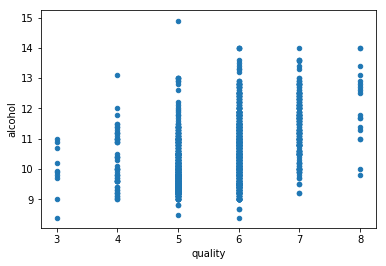

In [24]:
%matplotlib inline

dftame_red_wine.plot(kind='scatter', x='quality', y='alcohol')

### Split apply combine

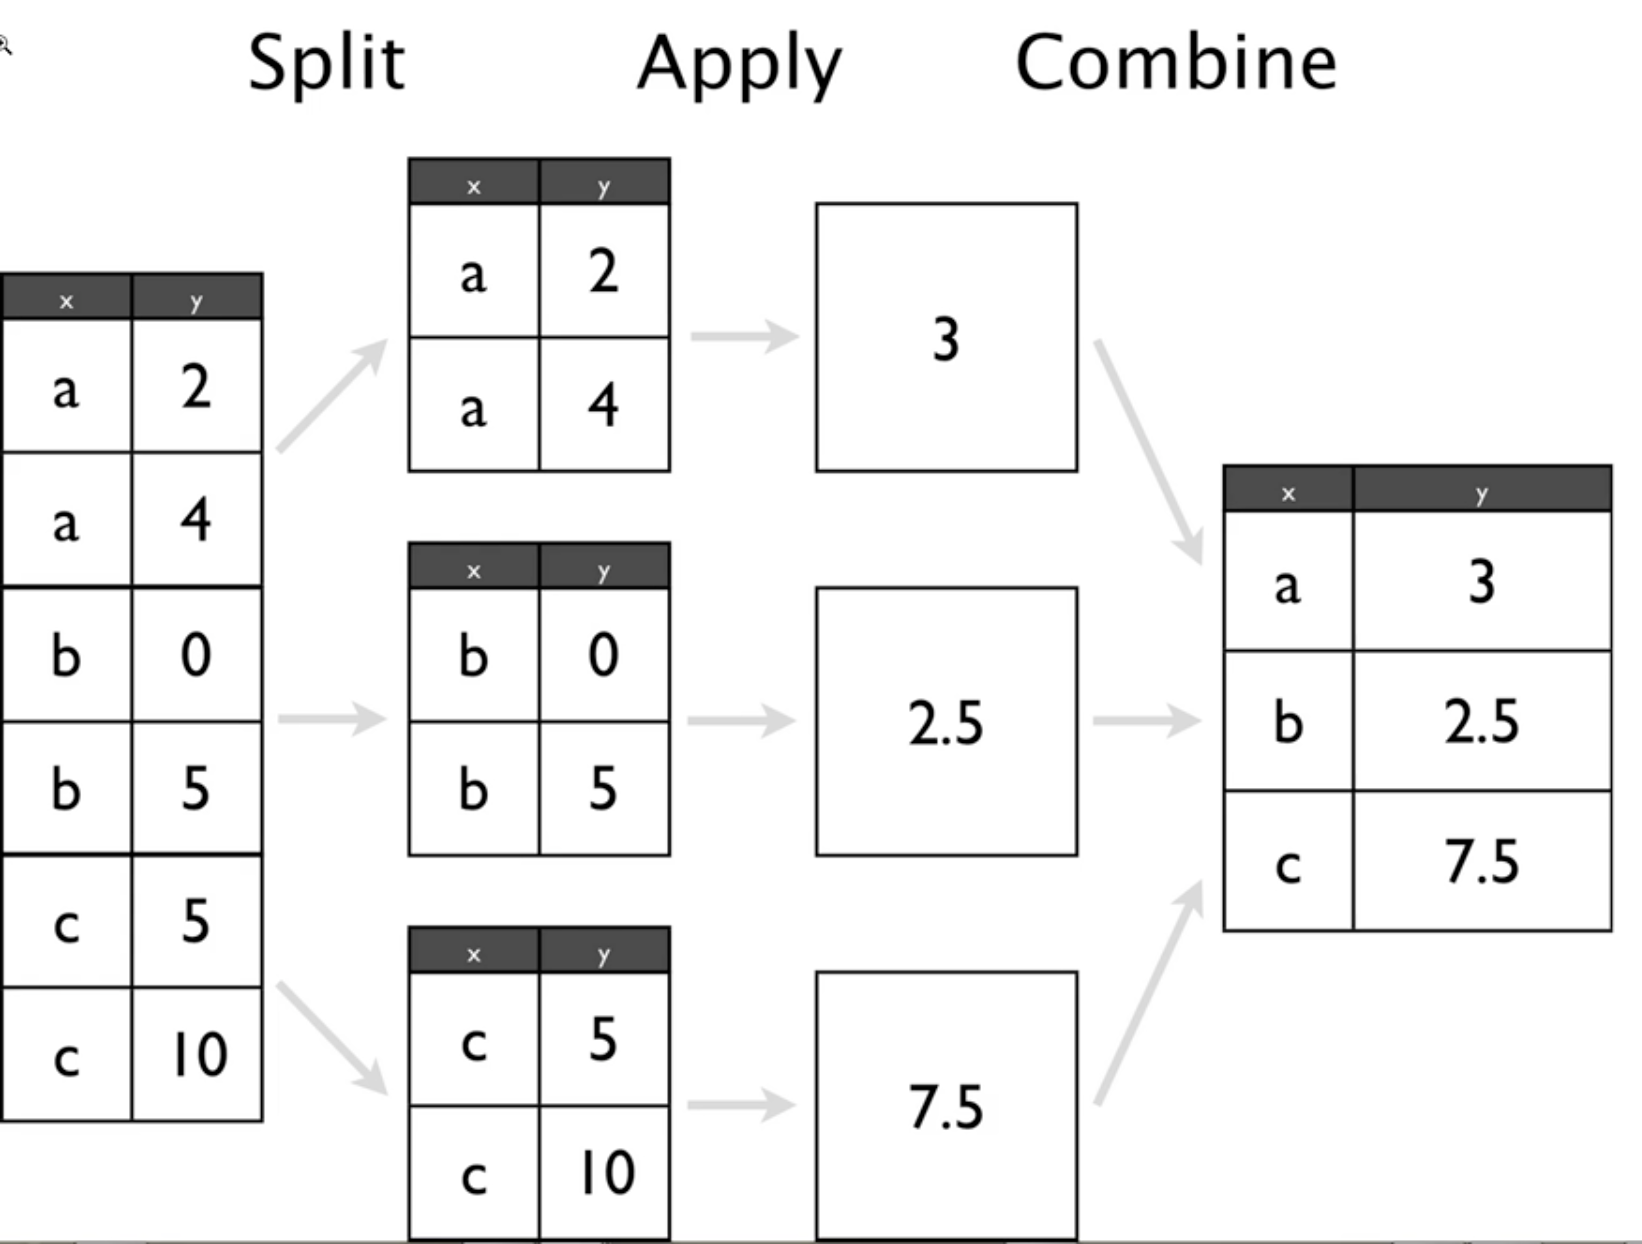

In [150]:
from IPython.display import Image
Image("split_apply_combine.png", width=400)

# Little example below

In [128]:
# Example of group by and apply
dtest = pd.DataFrame({'A': 'c    a    a    b    c    b    a    c    c    b'.split(), 
                      'B': [1.1, 2.0, 3.2, 8.4, 8.8, 1.0, 0.1, 4.5, 2.1, 6.6], 
                      'Q': [4.1, 6.3, 5.9, 2.1, 4.1, 0,   2.3, 3.1, 8.6, 5.2]})
dtest


# Sort values with respect to Q
dtest.sort_values('Q', ascending=False, inplace=True)

# Now group. Each group will still have values sorted by Q
g = dtest.groupby('A')

# Shows groups
g.size()

def Rank(df):
    df['wrank'] = np.arange(len(df)) + 1
    return df

# Assign 'rank' array to the single group 
g.apply(Rank)

# dtest is printed....



,A,B,Q
0,c,1.1,4.1
1,a,2.0,6.3
2,a,3.2,5.9
3,b,8.4,2.1
4,c,8.8,4.1
5,b,1.0,0.0
6,a,0.1,2.3
7,c,4.5,3.1
8,c,2.1,8.6
9,b,6.6,5.2


A
a    3
b    3
c    4
dtype: int64

,A,B,Q,wrank
8,c,2.1,8.6,1
1,a,2.0,6.3,1
2,a,3.2,5.9,2
9,b,6.6,5.2,1
0,c,1.1,4.1,2
4,c,8.8,4.1,3
7,c,4.5,3.1,4
6,a,0.1,2.3,3
3,b,8.4,2.1,2
5,b,1.0,0.0,3


In [147]:
# Apply the result of experiment below 

dftame_red_wine = pd.read_csv('winequality-red.csv', sep=';')
dftame_red_wine.head(2)

# Sort by increasing Alcohol content
dftame_red_wine.sort_values('alcohol', ascending=False, inplace=True)
# Group
g = dftame_red_wine.groupby('quality')

# Apply Rank function
g.apply(Rank).head(3)

dftame_red_wine1 = g.apply(Rank)
dftame_red_wine1.head(3)

# Basically, the dataset is split into various groups, grouped by 'quality'. With in each group, it is sorted by  'alcohol' content.



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wrank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.9917,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.9916,3.68,0.79,14.0,6,1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wrank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.9917,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.9916,3.68,0.79,14.0,6,1


In [138]:
# Both should be same
g.size()
dftame_red_wine['quality'].value_counts()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [149]:
# Now print out from each quality class, wines with highest alcoholic content.

dftame_red_wine1.loc[dftame_red_wine1.wrank == 1]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wrank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,1


### Easy tabulation

In [164]:
import io
from io import StringIO

data= """
test_name  Name   IQ
A      Lynda  high
B      Sam    low
C      Ben    high
D      Bet    low
E      Bob    high
F      Tom    high
G      Sam    low
H      Ben    high
I      Bet    low
J      Bob    medium
K      Lynda  high
"""

dframe = pd.read_table(StringIO(data), sep='\s+')
dframe

,test_name,Name,IQ
0,A,Lynda,high
1,B,Sam,low
2,C,Ben,high
3,D,Bet,low
4,E,Bob,high
5,F,Tom,high
6,G,Sam,low
7,H,Ben,high
8,I,Bet,low
9,J,Bob,medium


In [165]:
pd.crosstab(dframe.Name, dframe.IQ)
pd.crosstab(dframe.Name, dframe.IQ, margins=True)


IQ,high,low,medium
Name,,,
Ben,2,0,0
Bet,0,2,0
Bob,1,0,1
Lynda,2,0,0
Sam,0,2,0
Tom,1,0,0


IQ,high,low,medium,All
Name,,,,
Ben,2,0,0,2
Bet,0,2,0,2
Bob,1,0,1,2
Lynda,2,0,0,2
Sam,0,2,0,2
Tom,1,0,0,1
All,6,4,1,11
